In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

2025-02-06 14:52:50.248687: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-06 14:52:50.261698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738875170.274233 3569048 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738875170.277963 3569048 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-06 14:52:50.291563: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(12, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
inner_opt = keras.optimizers.Adamax(learning_rate = .00001)
my_optimizer = keras.optimizers.LossScaleOptimizer(inner_optimizer=inner_opt)
model.compile(optimizer= my_optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

I0000 00:00:1738875175.417103 3569048 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22293 MB memory:  -> device: 0, name: NVIDIA A30, pci bus id: 0000:21:00.0, compute capability: 8.0


In [3]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=750,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
"""
adamax, lr .0001, 90 epoch, 16, 16 = .8832
"""

Epoch 1/750


I0000 00:00:1738875176.496560 3569458 service.cc:148] XLA service 0x151344016640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738875176.496863 3569458 service.cc:156]   StreamExecutor device (0): NVIDIA A30, Compute Capability 8.0
2025-02-06 14:52:56.511182: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738875176.614880 3569458 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-06 14:52:56.674118: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5173 - loss: 0.6918

I0000 00:00:1738875177.371121 3569458 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5166 - loss: 0.6919 - val_accuracy: 0.5153 - val_loss: 0.6926
Epoch 2/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5210 - loss: 0.6917 - val_accuracy: 0.5221 - val_loss: 0.6923
Epoch 3/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5301 - loss: 0.6912 - val_accuracy: 0.5280 - val_loss: 0.6919
Epoch 4/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5342 - loss: 0.6909 - val_accuracy: 0.5322 - val_loss: 0.6915
Epoch 5/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5345 - loss: 0.6907 - val_accuracy: 0.5349 - val_loss: 0.6912
Epoch 6/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5501 - loss: 0.6898 - val_accuracy: 0.5387 - val_loss: 0.6908
Epoch 7/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5469 - loss: 0.6898 - val_accuracy: 0.5439 - val_loss: 0.6904
Epoch 8/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5545 - loss: 0.6893 - val_accuracy: 0.5491 - val_loss: 0.

'\nadamax, lr .0001, 90 epoch, 16, 16 = .8832\n'

In [9]:
print(results)
"""
Best model test accuracy: .8843
validation accuracy: .8908
train accuracy: .9359
"""

[0.29290688037872314, 0.8842800259590149]


'\nBest model test accuracy: .8843\nvalidation accuracy: .8908\ntrain accuracy: .9359\n'

In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

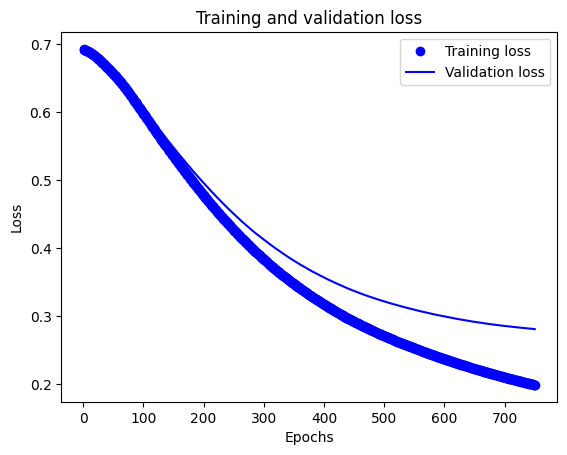

In [6]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

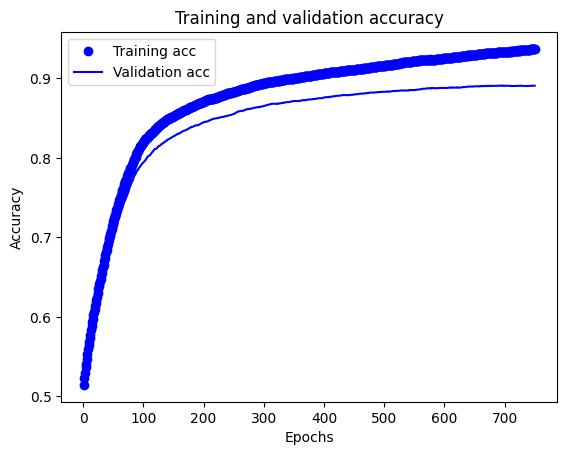

In [7]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()